<font size = 6 color = 'blue'>
<center> Notebook 0: Preprocesamiento de datos </center>

<font size = 5 color = 'blue'>
<center> Generación de un dataframe a partir del aumento de una base de imágenes de minerales </center>

<font size=5 color='black'>
    
La presentación tiene el siguiente índice: 
$$ $$
<font size=4 color='black'>
1.- Bibliotecas y base de datos
    
2.- Generación de un diccionario contenedor de la dirección de cada imagen en la base de datos.
<ul>
    <li>2.1 Generación de la colección utilizando Patolli
    <li>2.2 Función <i>get_address()</i>
    <li>2.3 Inspección del diccionario contenedor y los datos
    <li>2.4 La función <i>get_augmented_images()</i>
    <li>2.5 Generación del DataFrame
</ul>

3.- Generación del DataFrame para inferencias
<ul>
    <li>3.1 Levantamiento del DataFrame
    <li>3.2 Inspección de las imágenes para inferencias 
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgtSnUASwTYC3aM7FKjXMgCKPFlLum9V-VxrtysdgJVL2V77VVgyJM
Mounted at /content/drive


<font size = 6 color = 'royalblue'>
1.- Bibliotecas y base de datos

In [ ]:
import os
import cv2
import time
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

import tensorflow as tf
from tensorflow import keras

from keras_preprocessing.image import ImageDataGenerator

### Puedes consultar la base de datos original [aquí](https://www.kaggle.com/asiedubrempong/minerals-identification-dataset/code).

### La base de datos consta de 7 clases de minerales: Biotita, Bornita, Crisocola, Malaquita, Moscovita, Pirita, Cuarzo.

<font size = 6 color = 'royalblue'>
2.- Generación de un diccionario contenedor de la dirección de cada imagen en la base de datos.

In [ ]:
#Ruta de la carpeta que contiene la base de datos

address_core = '/content/drive/MyDrive/Clasificador_transfer_learning/TRAIN/'

In [ ]:
#Formatos de imágenes considerados

image_formats = ".jpg,.png,.JPG,.jpeg"

<font size = 5 color = 'royalblue'>
2.1.- Función <i>get_address()</i>

<font size=4 color='black'>
Definimos la función  <font size=4 color='blue'> <i>get_address()</i></font> la cual genera un diccionario con la dirección de cada una de las imágenes ordenándolas por clase, a partir de la dirección de la base de datos.

In [ ]:
def get_address(address_core = "", image_formats = ""):
    
    '''Función que regresa un diccionario con llaves (keys) cadenas de texto con el nombre
    de cada clase (tomado de las carpetas que aparecen en la carpeta contenedora) y como
    valores una lista que contiene todas las direcciones de archivos en general con la terminación que
    aparece en "image_format" y que se encuentran en la carpeta con el nombre de la clase en cuestión.
    Las direcciones son cadenas de texto (strings)
    '''
    
    classes = os.listdir(address_core)
    
    all_address = {}
    
    image_formats = image_formats.split(",")
    
    for item in classes:
        all_address[item] = []
        for root, dirs, files in os.walk(address_core + item + "/"):
            for file in files:
                for form in image_formats:
                    if file.endswith(form):
                        all_address[item].append(os.path.join(root, file))
                    
    size = 0
    for item in list(all_address.keys()):
        size += len(all_address[item])
        
    print("Las subcarpetas contenidas son {} y representan las diferentes clases a considerar.".format(classes))
    print("\nDirecciones obtenidas.\n \nEl tamaño de la base con archivos en los formatos {} es: {}.\n"\
          .format(image_formats, size))
                    
    return all_address

In [ ]:
image_format_address = get_address(address_core = address_core, 
                                   image_formats = image_formats)

Las subcarpetas contenidas son ['quartz', 'bornite', 'biotite', 'pyrite', 'malachite', 'muscovite', 'chrysocolla'] y representan las diferentes clases a considerar.

Direcciones obtenidas.
 
El tamaño de la base con archivos en los formatos ['.jpg', '.png', '.JPG', '.jpeg'] es: 756.



In [ ]:
#type(image_format_address["malachite"])
#len(image_format_address["muscovite"])
image_format_address["muscovite"][0]

'/content/drive/MyDrive/Clasificador_transfer_learning/TRAIN/muscovite/0056.jpg'

<font size = 5 color = 'royalblue'>
2.2.- Inspección del diccionario contenedor y los datos

In [ ]:
print("El directorio contenedor es, en efecto, del tipo {}. \n\nLo componen las keys {}"\
      .format(type(image_format_address), list(image_format_address.keys()) ))

print("Y tiene la siguiente cantidad de imágenes en su respectiva clase: \n")

for classe in os.listdir(address_core):
    print(classe + ":", len(image_format_address[classe]))

El directorio contenedor es, en efecto, del tipo <class 'dict'>. 

Lo componen las keys ['quartz', 'bornite', 'biotite', 'pyrite', 'malachite', 'muscovite', 'chrysocolla']
Y tiene la siguiente cantidad de imágenes en su respectiva clase: 

quartz: 113
bornite: 135
biotite: 54
pyrite: 78
malachite: 186
muscovite: 61
chrysocolla: 129


<font size=4 color='black'>
    
Podemos visualizar estas imágenes con la biblioteca <i>__matplotlib__</i>:

<font size = 4 color = 'blue'>
Cuarzo

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (650, 650, 3)


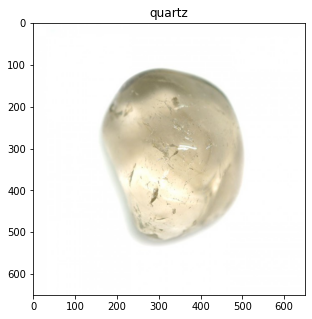

In [ ]:
index = 60
clase = "quartz"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Biotita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (422, 500, 3)


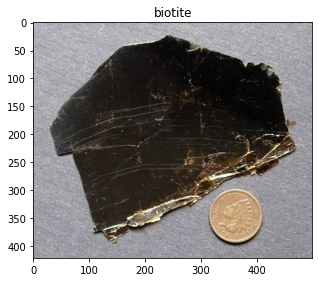

In [ ]:
index = 6
clase = "biotite"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Bornita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (1603, 1535, 3)


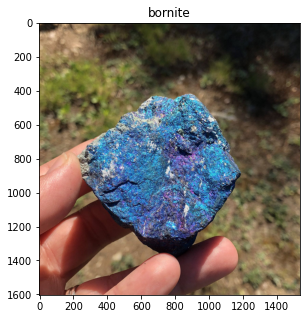

In [ ]:
index = 60
clase = "bornite"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Crisocola

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (3724, 2094, 3)


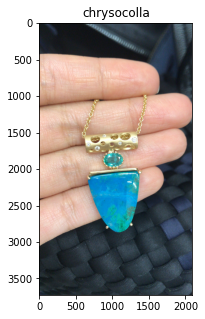

In [ ]:
index = 75
clase = "chrysocolla"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Malaquita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (263, 500, 3)


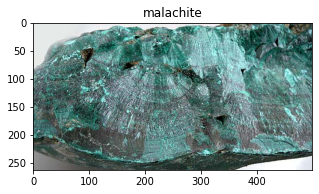

In [ ]:
index = 7
clase = "malachite"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Muscovita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (464, 570, 3)


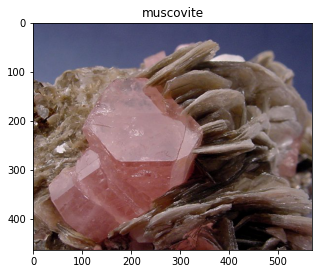

In [ ]:
index = 60
clase = "muscovite"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Pirita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (282, 500, 3)


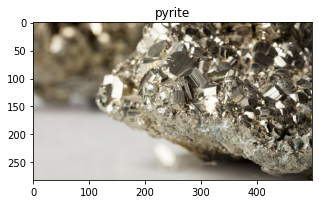

In [ ]:
index = 60
clase = "pyrite"

an_image = plt.imread(image_format_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size=4 color='black'>
    
Sobre el método [imread()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html).

<font size=4 color='black'>
    
Sobre el método [imshow()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html).

<font size = 5 color = 'royalblue'>
2.3.- Configuración de las imágenes aumentadas

<font size=4 color='black'>
    
Utilizando las clase de Keras <i>__ImageDataGenerator()__</i> podemos configurar operaciones a aplicar en las imágenes originales y que se almacenarán como imágenes generadas.

<font size=4 color='black'>
    
Sobre la clase [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:
#Configuración de las distintas operaciones posibles.

datagen = ImageDataGenerator(rotation_range = 30,
                             #width_shift_range = 0.01,
                             #height_shift_range = 0.01, 
                             #shear_range = 50,
                             #zoom_range = 0.5,
                             horizontal_flip = True,
                             #channel_shift_range = 80,
                             #brightness_range = [0.1,1],
                             vertical_flip = True
                            )

<font size = 5 color = 'royalblue'>
2.4.- La función <i>get_augmented_images()</i>

<font size=4 color='black'>
Definimos la siguiente función la cual generará imágenes con las operaciones establecidas y las almacenará en la carpeta correspondiente a la clase de la cual tomó la imagen base.

In [ ]:
os.listdir(address_core)

['quartz',
 'bornite',
 'biotite',
 'pyrite',
 'malachite',
 'muscovite',
 'chrysocolla']

In [ ]:
def get_augmented_images(address_core = "", expected_size = 300, all_address = {} ):
    
    '''Función que genera nuevas imágenes a partir de una base de imágenes original a partir de la aplicación y
    y operación de estas de manera aleatoria.
    Inputs:
    - classes: ""lista"" con el nombre de cada clase tal como aparece en la carpeta que es la base original.
    - address_core: ""string"" con dirección de la carpeta que contiene la base original.
    - expected_size: ""entero"" que representa el tamaño deseado de imágenes por cada clase.
    - all_address: ""diccionario"" con cada key el nombre de cada clase como ""string"" y como valor a cada key
    una lista con la dirección de cada imágen perteneciente a la clase en key.
    '''
    
    classes = os.listdir(address_core)
    
    address_with_issues = []
    
    
    t1 = time.time()
    
    print("Iniciando aumento: \n")
    
    for classe in classes:
        
        counter = 0
        
        print("\n\nClase {} en proceso".format(classe))
        
        image_paths_list = all_address[classe] #Seleccionamos las rutas
        
        augmented_steps = mt.floor( expected_size / len(all_address[classe]) ) + 15
        
        for path in image_paths_list:
            
            counter = sum([len(files) for root, dirs, files in os.walk(address_core + classe)])
            
            if counter < expected_size:
                try:
                    image_raw = imread(path)
                    imagen = np.expand_dims(image_raw, 0)
                    save_here = address_core + classe + "/"
                    prefijo = "augmented_by_keras"
                    formato = "jpg"
                    ciclos = range(augmented_steps)
            
                    datagen.fit(imagen)
        
                    for x, val in zip(datagen.flow(imagen,
                                                   #seed = 10, 
                                                   save_to_dir = save_here, 
                                                   save_prefix = prefijo, 
                                                   save_format = formato), ciclos):
                        pass
                except:
                    address_with_issues.append(path)
                    
        
        print(classe + " Aumentada. Su nuevo tamaño es: {}"\
              .format(sum([len(files) for root, dirs, files in os.walk(address_core + classe)])))
                
    t2 = time.time()
    
    print("\nEl aumento de imágenes tuvo una duración de {} minutos".format( np.round((t2-t1)/60, 2)  ))

    return address_with_issues

<font size = 5 color = 'red'>
NOTA: Una vez ejecutada la función <i>get_augmented_images()</i> la carpeta asociada a la ruta designada por <i>address_core</i> será modificada almacenando las imágenes aumentadas.

In [ ]:
address_with_issues = get_augmented_images(address_core = address_core,
                                            expected_size = 200,
                                            all_address = image_format_address )

Iniciando aumento: 



Clase quartz en proceso
quartz Aumentada. Su nuevo tamaño es: 216


Clase bornite en proceso
bornite Aumentada. Su nuevo tamaño es: 205


Clase biotite en proceso
biotite Aumentada. Su nuevo tamaño es: 205


Clase pyrite en proceso
pyrite Aumentada. Su nuevo tamaño es: 204


Clase malachite en proceso
malachite Aumentada. Su nuevo tamaño es: 204


Clase muscovite en proceso
muscovite Aumentada. Su nuevo tamaño es: 213


Clase chrysocolla en proceso
chrysocolla Aumentada. Su nuevo tamaño es: 213

El aumento de imágenes tuvo una duración de 2.2 minutos


<font size=4 color='black'>
    
Como observamos, la base de datos fue aumentada y todas las clases ahora cuentan con aproximadamente <i>__200__</i> imágenes.

<font size=4 color='black'>
    
Una vez aumentada la base de datos, se levanta cada imagen como un arreglo de Numpy y se reescala la imagen a las dimensiones <i>__(224,224,3)__</i> donde la última dimensión corresponde a los filtros <i>__RGB__</i>.

<font size = 5 color = 'royalblue'>
2.5.- Generación del DataFrame 

<font size=4 color='black'>
    
Generamos tres listas con la ruta, la imagen asociada a esta ruta en forma de arreglo de Numpy y la clase a la que corresponde. A cada clase se le asocia un número comenzando de 0.

In [ ]:
clases = []
address = []
images=[]
index = 0

errors = []

for folder in os.listdir(address_core):
    file_names = os.listdir(address_core + folder)
    for file in file_names:
        try:
            address.append(address_core + folder + "/" + file)
            clases.append(index)
            img = imread(address_core + folder + "/" + file)
            img = cv2.resize(img,(224,224))
            images.append(img)
        except:
            errors.append(address_core + folder + "/" + file)

    index = index + 1

In [ ]:
print("Se encontraron {} imágenes con errores".format(len(errors)))

Se encontraron 0 imágenes con errores


In [ ]:
print("\Se obtienen {} etiquetas correspondientes a las {} imágenes y a cada una de estas les corresponde una de las {} direcciones."\
      .format(len(clases), len(images), len(address)))

\Se obtienen 1484 etiquetas correspondientes a las 1484 imágenes y a cada una de estas les corresponde una de las 1484 direcciones.


In [ ]:
errors

[]

<font size=4 color='black'>
    
Generamos el DataFrame utilizando <i>__Pandas__</i>.

In [ ]:
df = pd.DataFrame({
    'file_name': address,
    'images': images,
    'clases': clases
})

In [ ]:
df.head(10)

,file_name,images,clases
0,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[125, 121, 120], [125, 121, 120], [125, 121,...",0
1,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[22, 21, 25], [23, 22, 28], [22, 21, 26], [2...",0
3,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[252, 253, 248], [252, 253, 248], [252, 253,...",0
4,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[2, 112, 69], [8, 116, 73], [19, 118, 75], [...",0
5,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[157, 167, 166], [157, 167, 166], [160, 169,...",0
6,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[241, 242, 244], [241, 242, 244], [241, 242,...",0
7,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[5, 5, 5], [4, 4, 4], [5, 5, 5], [2, 2, 2], ...",0
8,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[71, 109, 72], [80, 118, 81], [85, 121, 83],...",0
9,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[159, 184, 155], [160, 183, 153], [148, 162,...",0


In [ ]:
df.tail(10)

,file_name,images,clases
1474,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6
1475,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[50, 51, 72], [50, 51, 72], [50, 51, 72], [5...",6
1476,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[50, 51, 72], [50, 51, 72], [50, 51, 72], [5...",6
1477,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[50, 51, 72], [50, 51, 72], [50, 51, 72], [5...",6
1478,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[50, 51, 72], [50, 51, 72], [50, 51, 72], [5...",6
1479,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6
1480,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6
1481,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6
1482,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[50, 51, 72], [50, 51, 72], [50, 51, 72], [5...",6
1483,/content/drive/MyDrive/preprocesamiento/base_k...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6


<font size=4 color='black'>
    
Sobre el método [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

<font size = 6 color = 'royalblue'>
3.- Generación del DataFrame para inferencias.

<font size=4 color='black'>
    
En la carpeta <i>__imagenes_inferencias__</i> se incluyen imágenes seleccionadas de internet que no se incluyen en la base de datos.
Se genera un DataFrame con estas imágenes para utilizarse después de entrenar el modelo en el notebook 2.

<font size = 5 color = 'royalblue'>
3.1.- Levantamiento del DataFrame

In [ ]:
address_core_inferences = '/content/drive/MyDrive/preprocesamiento/imagenes_inferencias/'

In [ ]:
address_inf = []
images_inf = []
index_inf = 0

errors_inf = []

for folder in os.listdir(address_core_inferences):
    file_names = os.listdir(address_core_inferences + folder)
    for file in file_names:
        try:
            address_inf.append(folder)
            img = imread(address_core_inferences + folder + "/" + file)
            img = cv2.resize(img,(224,224))
            images_inf.append(img)
        except:
            errors_inf.append(address_core_inf + folder + "/" + file)

    index_inf = index_inf + 1

In [ ]:
df_inferences = pd.DataFrame({
    'file_name': address_inf,
    'images': images_inf
})

In [ ]:
df_inferences

,file_name,images
0,muscovite,"[[[166, 166, 168], [166, 166, 168], [166, 166,..."
1,muscovite,"[[[216, 220, 200], [215, 220, 200], [212, 218,..."
2,muscovite,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,muscovite,"[[[9, 10, 12], [9, 10, 12], [7, 8, 10], [10, 1..."
4,muscovite,"[[[225, 229, 241], [224, 228, 240], [224, 228,..."
5,biotite,"[[[18, 18, 18], [18, 18, 18], [18, 18, 18], [1..."
6,biotite,"[[[204, 201, 192], [209, 206, 197], [212, 208,..."
7,biotite,"[[[241, 242, 242], [240, 242, 241], [238, 240,..."
8,biotite,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
9,chrysocolla,"[[[168, 168, 168], [168, 168, 168], [168, 168,..."


<font size=4 color='black'>
    
Una vez generados ambos dataframes son guardados como archivos pickle lo cual facilitará su despliegue en el notebook 2.

In [ ]:
df.to_pickle('/content/drive/MyDrive/preprocesamiento/dataMinerals_10_06.pkl')
df_inferences.to_pickle('/content/drive/MyDrive/preprocesamiento/images_for_inferences_10_06.pkl')

<font size = 5 color = 'royalblue'>
3.2.- Inspección de las imágenes para inferencias.

<font size=4 color='black'>
    
Utilizamos la función <i>__get_address()__</i> y obtenemos las direcciones de las imágenes para su inspección.

In [ ]:
inference_image_address = get_address(address_core = address_core_inferences, 
                                      image_formats = image_formats)

Las subcarpetas contenidas son ['muscovite', 'biotite', 'chrysocolla', 'malachite', 'bornite', 'pyrite', 'quartz'] y representan las diferentes clases a considerar.

Direcciones obtenidas.
 
El tamaño de la base con archivos en los formatos ['.jpg', '.png', '.JPG', '.jpeg'] es: 33.



<font size=4 color='red'>
    
Recordar que únicamente se cuenta con 5 imágenes de cada clase, por lo que <i>__index__</i> debe ser un número entre 0 y 4.

<font size = 4 color = 'blue'>
Cuarzo

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (169, 297, 3)


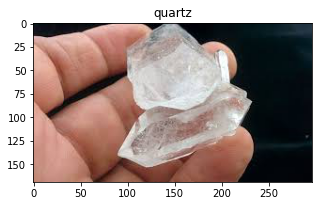

In [ ]:
index = 0
clase = "quartz"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Biotita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (833, 800, 3)


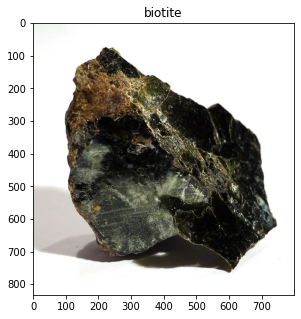

In [ ]:
index = 0
clase = "biotite"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Bornita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (226, 223, 3)


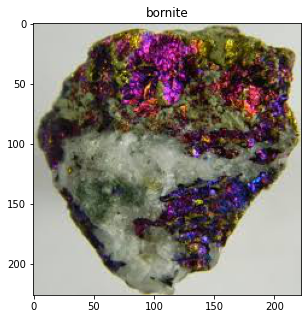

In [ ]:
index = 0
clase = "bornite"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Crisocola

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (172, 294, 3)


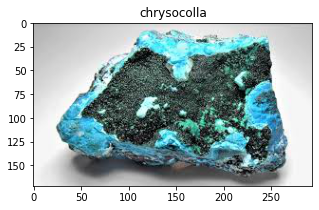

In [ ]:
index = 0
clase = "chrysocolla"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Malaquita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (439, 640, 3)


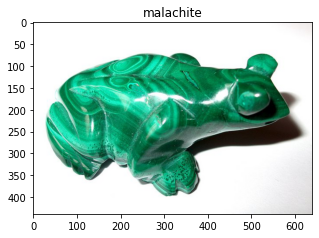

In [ ]:
index = 0
clase = "malachite"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Muscovita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (499, 700, 3)


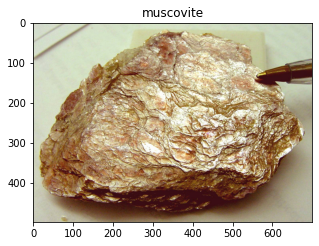

In [ ]:
index = 0
clase = "muscovite"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()

<font size = 4 color = 'blue'>
Pirita

La imagen es del tipo <class 'numpy.ndarray'> y tiene dimensiones (323, 380, 3)


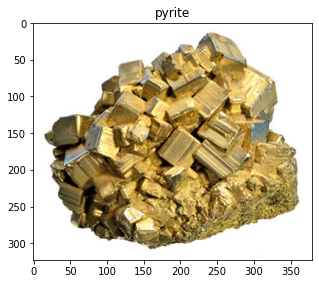

In [ ]:
index = 0
clase = "pyrite"

an_image = plt.imread(inference_image_address[clase][index])

print("La imagen es del tipo {} y tiene dimensiones {}".format(type(an_image), an_image.shape))


plt.figure(figsize=(5,5))
plt.title(clase , size = 12)
plt.imshow(an_image)
plt.show()